# Grid shading

This is a single cell notebook to demonstrate precipitation type plotting using Magics' grid shading option.

### Installing Magics
If you don't have Magics installed, run the next cell to install Magics using conda.

In [ ]:
# Install Magics in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} Magics

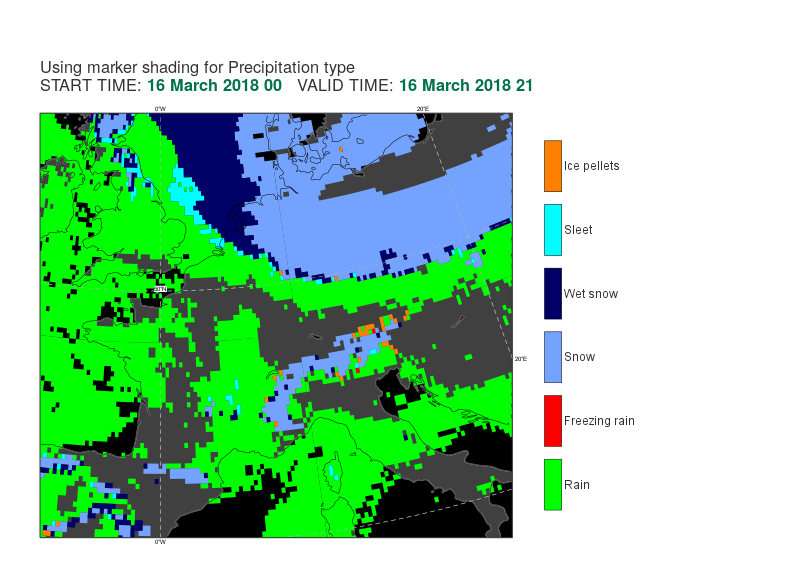

In [1]:
import Magics.macro as magics

#Setting the geographical area
projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name    = "central_europe",
    page_id_line             = "off"
)

#Setting the background
background = magics.mcoast(
    map_coastline_colour            = "grey",
    map_coastline_resolution        = "medium",
    map_coastline_thickness         = 2,
    map_coastline_land_shade        = "on",
    map_coastline_land_shade_colour = "RGB(0.25,0.25,0.25)",
    map_coastline_sea_shade         = "on",
    map_coastline_sea_shade_colour  = "black",
    map_grid_line_style             = "dash",
    map_grid_colour                 = "grey"
)
#Setting the foreground
foreground = magics.mcoast(
    map_grid_line_style             = "dash",
    map_grid_colour                 = "grey")

#Loading GRIB file
ptype = magics.mgrib(grib_input_file_name = "../../data/ptype.grib")

#Defining the contour
grid_shading = magics.mcont(
    contour_shade_technique      = "grid_shading",
    contour_shade_colour_method  = "list",
    contour                      = "off",
    contour_level_selection_type = "level_list",
    contour_level_list           = [0.5,1.5,3.5,5.5,6.5,7.5,8.5],
    contour_shade                = "on",
    contour_shade_min_level      = 0.5,
    contour_shade_max_level      = 8.5,
    contour_shade_colour_list    = ["green","red","sky","navy","cyan","orange"],
    legend                       = "on"
) 

#Defining the legend
legend = magics.mlegend(
    legend_user_lines         =  ["Rain","Freezing rain", "Snow", "Wet snow", "Sleet", "Ice pellets"],
    legend_box_mode           = "automatic",
    legend_automatic_position = "right",
    legend_text_composition   = "user_text_only",
    legend_text_colour        = "charcoal",   
    legend_text_font_size     = 0.5)

#Setting the title
title = magics.mtext( 
    text_lines          = ["Using marker shading for <grib_info key='name'/>",
                           "START TIME: <font colour='evergreen' style='bold'><grib_info key='base-date' format='%d %B %Y %H'/></font>   VALID TIME: <font colour='evergreen' style='bold'><grib_info key='valid-date' format='%d %B %Y %H'/></font>"],
    text_justification  = 'left',
    text_font_size      = 0.7,
    text_mode           = "automatic",
    text_colour         = "charcoal") 

#Plotting
magics.plot(projection, background, ptype, grid_shading, foreground, legend, title)